In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from scipy.spatial import Voronoi, voronoi_plot_2d

Load the dataset

In [3]:
df = pd.read_csv('cm_dataset_2.csv', header=None)
df.head()

,0,1
0,-1.2061,-2.52680
1,-3.7038,0.33831
2,4.3444,0.96302
3,3.3614,2.94250
4,4.1175,2.15120


In [4]:
df.shape

(1000, 2)

Visualization

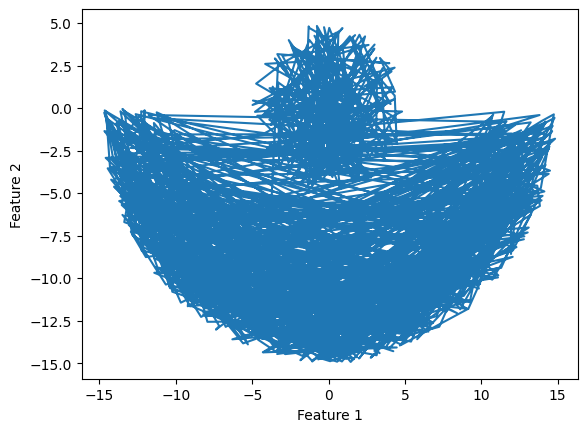

In [5]:
plt.plot(df[0], df[1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# **(i)**

# **Lloyd's algorithm for K-means clustering with k = 2**

In [6]:
def lloyds_kmeans(data, n_clusters=2, max_iters=100):
    """
    Implements Lloyd's algorithm for K-means clustering.

    Args:
        data (np.ndarray): A NumPy array of data points (n_samples, n_features).
        n_clusters (int): The number of clusters (default is 2).
        max_iters (int): The maximum number of iterations to run the algorithm.

    Returns:
        tuple: A tuple containing:
            - cluster_labels (np.ndarray): A list of cluster assignments for each data point.
            - centroids (np.ndarray): A list of final cluster centroids.
    """

    data = np.array(data)
    n, d = data.shape

    # 1. Initialize cluster centers (centriods) randomly
    centroids = data[np.random.choice(n, n_clusters, replace=False)]

    for _ in range(max_iters):
        # 2. Assign data points to the nearest cluster center
        distances_to_centers = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances_to_centers, axis=1)

        # 3. Update cluster centers based on the assigned data points
        new_centroids = []
        for cluster_idx in range(n_clusters):
            cluster_points = data[cluster_labels == cluster_idx]
            if len(cluster_points) > 0:
                new_centroids.append(np.mean(cluster_points, axis=0))
            else:
                # Retain the old cluster center for empty clusters
                new_centroids.append(centroids[cluster_idx])

        new_centroids = np.array(new_centroids)

        # 4. Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return cluster_labels, centroids

### Visualization

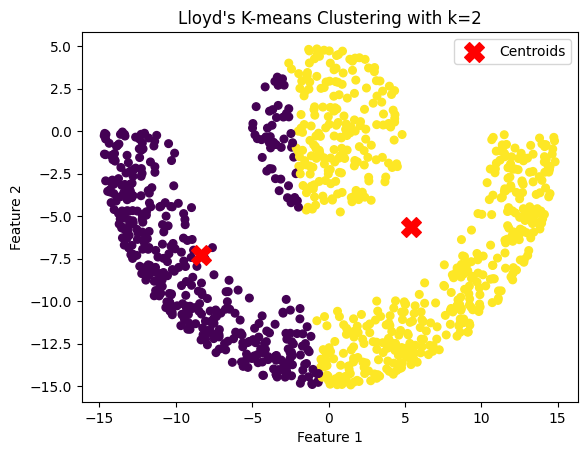

In [7]:
labels, centroids = lloyds_kmeans(df, 2, 100)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Lloyd\'s K-means Clustering with k=2')
plt.show()

### Function for computing error.

In [8]:
def calculate_error(data, labels, centroids):
  """Calculates the total squared error for the clustering."""
  error = 0
  for i, label in enumerate(labels):
    error += np.linalg.norm(data[i] - centroids[label]) ** 2
  return error

###  Make 5 different random initializations, plot the error function w.r.t iterations and plot the clusters obtained in each case.

<ipython-input-9-b9c080d363c5>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 5)


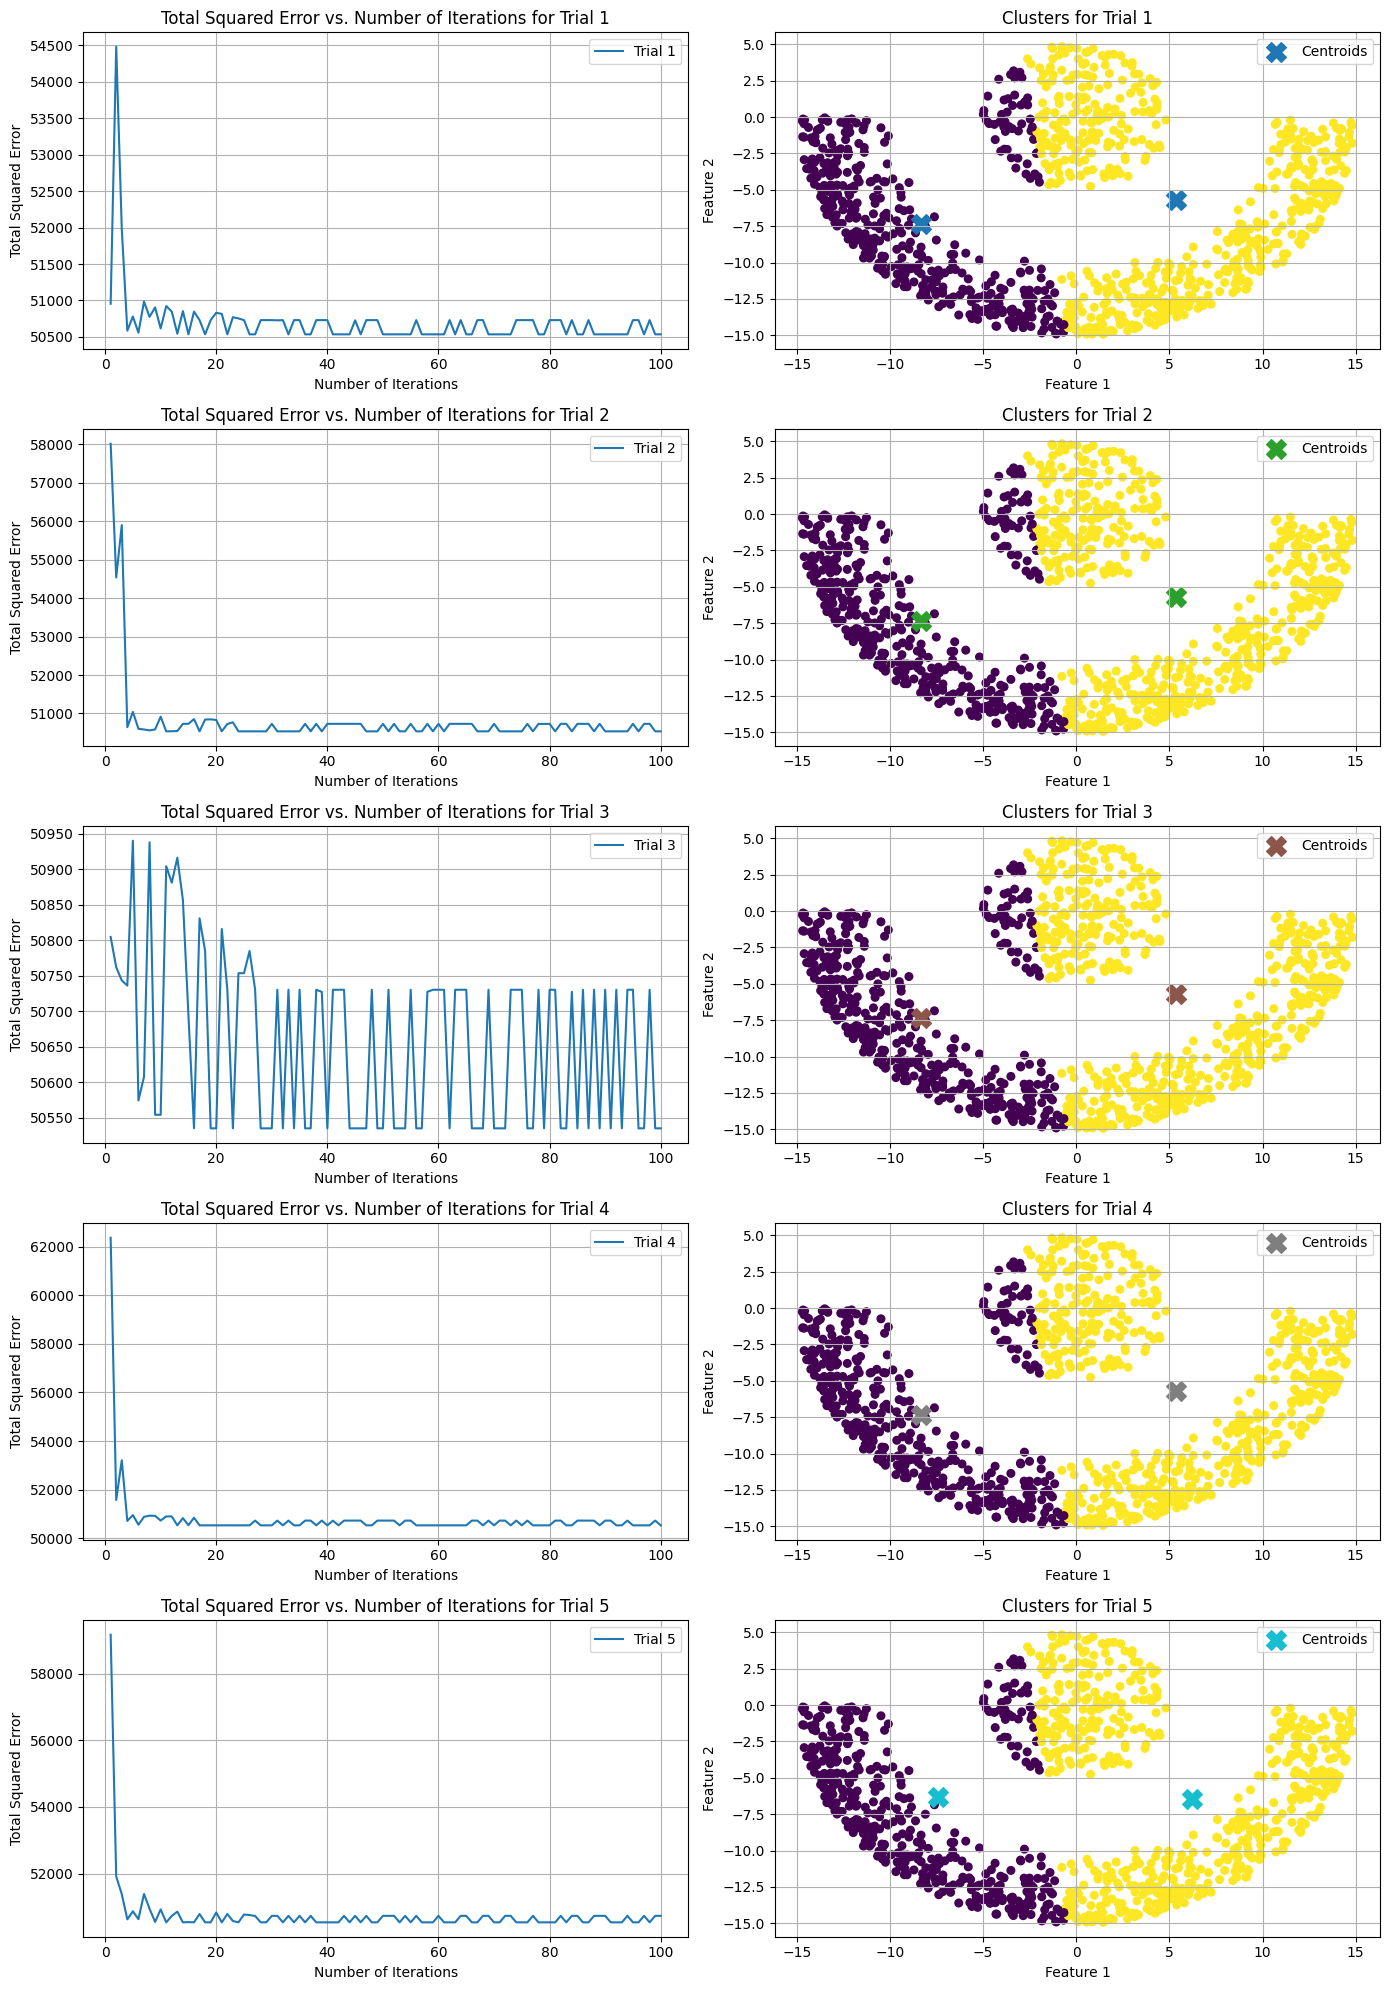

In [9]:
n_trials = 5

colors = plt.cm.get_cmap('tab10', 5)
fig, axes = plt.subplots(5, 2, figsize=(14, 20))

for i in range(n_trials):
  errors = []
  for j in range(1, 101):
      labels_temp, centroids_temp = lloyds_kmeans(df, n_clusters=2, max_iters=j)
      errors.append(calculate_error(np.array(df), labels_temp, centroids_temp))

  # Plot error function
  axes[i, 0].plot(range(1, 101), errors, label=f'Trial {i+1}')
  axes[i, 0].set_xlabel('Number of Iterations')
  axes[i, 0].set_ylabel('Total Squared Error')
  axes[i, 0].set_title(f'Total Squared Error vs. Number of Iterations for Trial {i+1}')
  axes[i, 0].legend()
  axes[i, 0].grid(True)

  # Plot clusters
  axes[i, 1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis', s=30)
  axes[i, 1].scatter(centroids_temp[:, 0], centroids_temp[:, 1], color=colors(i), marker='X', s=200, label='Centroids')
  axes[i, 1].set_xlabel('Feature 1')
  axes[i, 1].set_ylabel('Feature 2')
  axes[i, 1].set_title(f'Clusters for Trial {i+1}')
  axes[i, 1].legend()
  axes[i, 1].grid(True)

plt.tight_layout()
plt.show()

# **(ii)**

### For each K = {2, 3, 4, 5}, Make an arbitrary initialization; obtain cluster centers and plot the Voronoi regions associated to each cluster center.

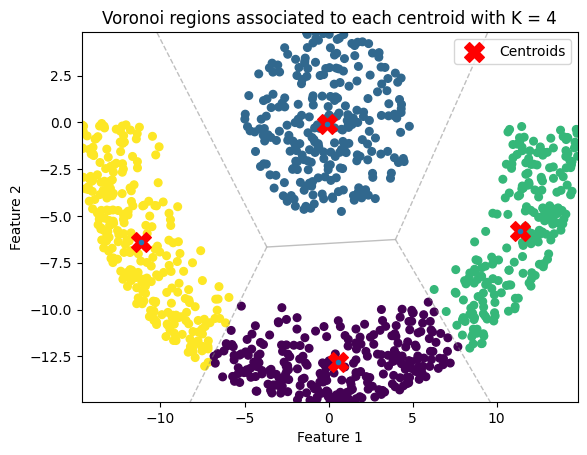

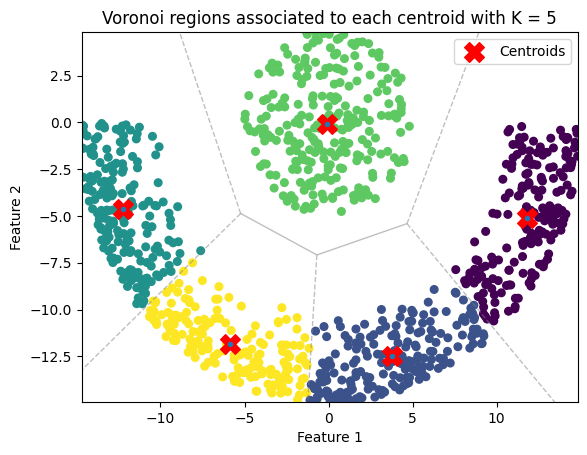

In [10]:
for k in [2, 3, 4, 5]:
    labels, centroids = lloyds_kmeans(df, n_clusters=k, max_iters=100)
    data = np.array(df)

    if centroids.shape[0] < 4:
        print(f"Warning: Not enough centroids (only {centroids.shape[0]}) for Voronoi diagram with K = {k}.")
        continue

    vor = Voronoi(centroids)
    fig, ax = plt.subplots()
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=1, line_alpha=0.5)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.xlim(df[0].min(), df[0].max())
    plt.ylim(df[1].min(), df[1].max())
    plt.title(f'Voronoi regions associated to each centroid with K = {k}')
    plt.show()

# **(iii)**

### Lloyd's algorithm (K-means) might not be the most suitable method for clustering this particular dataset. The dataset seems to have a non-linear, possibly circular or spiral, structure. Lloyd's algorithm is designed for identifying clusters with spherical shapes and may struggle with datasets that have complex or elongated clusters. This algorithm can get trapped in local optima, leading to suboptimal clustering solutions, especially when dealing with non-convex clusters. Spectral Clustering would be a right choice for this dataset.